In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from termcolor import colored as cl
from sklearn.cluster import KMeans # K-means algorithm
from mpl_toolkits.mplot3d import Axes3D # 3d plot

In [5]:
family = pd.read_csv('Data/familyxx.csv')
family["family_id"] = family["HHX"] + family["SRVY_YR"] + family["FMX"]
family.head()

person = pd.read_csv('Data/personsx.csv')
person["family_id"] = person["HHX"] + person["SRVY_YR"] + person["FMX"]
person.head()

df = person.merge(family, on = 'family_id', how='inner')
df

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
0,1,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1,2,2,NaN,2,1,1,NaN,NaN
1,1,NaN,1,2,2.0,2.0,NaN,NaN,NaN,2.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
2,2,NaN,1,1,2.0,1.0,NaN,NaN,NaN,0.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
3,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
4,1,NaN,1,1,2.0,2.0,NaN,NaN,NaN,1.0,...,1.0,2,2,2,NaN,1,4,1,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73728,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,1.0,1,2,2,NaN,2,1,1,NaN,1.0
73729,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,4.0,5,1,1,2.0,2,1,1,2.0,1.0
73730,1,NaN,4,2,2.0,2.0,NaN,NaN,NaN,1.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0
73731,2,NaN,4,1,NaN,1.0,NaN,NaN,NaN,2.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0


In [34]:
# for checking number of null values
for i in df.columns:
    if(df[i].isnull().sum() > 0):
        df = df.drop([i], axis=1)

In [35]:
df = df[df['FDMEDYN'] < 7]

In [36]:
df = df[df['FHICOST'] < 7]

In [37]:
X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

Cluster data samples :  [[-8.48439709e-01 -1.30221934e+00  9.77112792e-01 -9.25539606e-02
  -5.12004832e-01 -6.32153900e-01  4.55067558e-01  4.44636380e-01
  -4.63200155e-01  3.42733325e-01 -3.26916444e-01 -4.33931248e-01
  -1.42146168e-01 -4.03515375e-01  1.68703493e+00  0.00000000e+00
   0.00000000e+00  5.80007459e-01 -5.65488634e-01 -4.81810104e-01
  -1.70725467e+00 -3.65131139e-01 -4.77041008e-01 -1.57371705e+00
   2.93813164e-01 -1.43616855e+00 -4.03318222e-01  2.81561536e-01
   2.05237989e-01  2.43554718e-01  9.18459308e-02 -2.71313863e+00
  -1.77491784e+00  2.32629106e-01  2.12836429e-01  1.33445479e-01
   4.08737929e-01  8.29871235e-01  4.10502070e-01 -4.01454937e-01
  -5.33484916e-02 -1.29881047e+00 -4.74972002e-02  4.63955215e-02
  -4.98703704e-02 -7.08022432e-02 -7.04174678e-02  7.80831799e-02
   1.08044861e-02 -5.20572895e-02 -3.24507898e-02 -3.94416255e-02
  -2.45961218e-03 -1.49038294e+00  6.66753342e-01 -1.18878625e+00
  -7.19532266e-02  1.16248360e-01 -7.86887094e-02 -2

In [38]:
# MODELING

clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
df['cluster_num'] = labels
df.head()

,FPX,INTV_QRT,SEX,FMX_x,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,R_MARITL,...,FHIOGVCT,FHIIHSCT,FHIEXCT,FHICOST,FMEDBILL,FMEDBPAY,FSAF,FHICOVCT,FHICOVYN,cluster_num
0,1,1,2,1,1,1,2,12,1,4,...,0,0,0,1,2,2,2,1,1,0
1,1,1,2,1,1,1,2,12,1,1,...,0,0,0,2,1,1,2,3,1,0
2,2,1,1,1,2,2,2,12,1,1,...,0,0,0,2,1,1,2,3,1,0
3,3,1,1,1,4,4,2,12,1,7,...,0,0,0,2,1,1,2,3,1,0
4,1,1,1,1,1,1,2,12,1,1,...,0,0,0,2,2,2,1,4,1,0


In [40]:
df.groupby('cluster_num').mean()

,FPX,INTV_QRT,SEX,FMX_x,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,R_MARITL,...,FHIPUBCT,FHIOGVCT,FHIIHSCT,FHIEXCT,FHICOST,FMEDBILL,FMEDBPAY,FSAF,FHICOVCT,FHICOVYN
cluster_num,,,,,,,,,,,,,,,,,,,,,
0,2.139747,1.203528,1.513756,1.015615,2.773339,2.604759,1.824438,10.443490,1.319853,2.970340,...,0.036517,0.005122,0.024537,0.097571,2.004379,1.870043,1.782758,1.917589,2.940226,1.047753
1,2.118354,3.476402,1.507781,1.016287,2.735749,2.586741,1.831081,10.485099,1.330036,3.032232,...,0.028182,0.006694,0.033340,0.112940,1.980559,1.857514,1.795566,1.936389,2.869665,1.049329
2,2.141253,2.405384,1.513068,1.015071,2.816260,2.603039,1.829886,10.485982,1.311945,2.989471,...,0.027912,0.010033,0.036376,0.100789,1.967257,1.866262,1.772575,1.904662,2.908419,1.053099


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


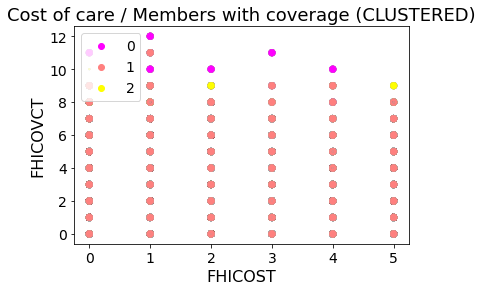

In [41]:

area = np.pi * (df.FDMEDYN) ** 4

sb.scatterplot('FHICOST', 'FHICOVCT', 
               data = df, 
               s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('Cost of care / Members with coverage (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('FHICOST', 
           fontsize = 16)
plt.ylabel('FHICOVCT', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

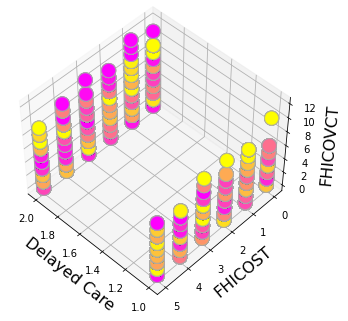

In [42]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df['FDMEDYN'], df['FHICOST'], df['FHICOVCT'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Delayed Care', 
              fontsize = 16)
ax.set_ylabel('FHICOST', 
              fontsize = 16)
ax.set_zlabel('FHICOVCT', 
              fontsize = 16)

plt.show()